In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

## Load data

In [87]:
df = pd.read_pickle('../data/siju-dataframe.pkl')
print(f'Dataframe shape: {df.shape}')

df = df[df["stimulus"] != "high_Vinegar"]

df.head()

Dataframe shape: (5910, 22)


,experiment_id,stimulus,valence,dorsal_to_ventral,hours_starved,order_presented,virgin,lobe,adaptation,pre_std,...,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F,greek_lobe,hours starved
0,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a1,0.007500,0.030948,...,0.181160,2016-08-09 00:00:000,0,NaN,0.341723,0.341723,0.341723,0.021723,α1,0
1,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a2,-0.010356,0.020711,...,0.157602,2016-08-09 00:00:000,0,NaN,0.230774,0.230774,0.230774,0.017802,α2,0
2,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a3,-0.027494,0.026490,...,0.343259,2016-08-09 00:00:000,0,NaN,1.023435,1.023435,1.023435,0.020086,α3,0
3,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap1,0.026010,0.041217,...,0.258084,2016-08-09 00:00:000,0,NaN,0.476658,0.476658,0.476658,0.028166,α'1,0
4,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap2,0.000798,0.041212,...,0.268255,2016-08-09 00:00:000,0,NaN,0.412485,0.412485,0.412485,0.034686,α'2,0


In [88]:
df = df.drop('order_presented', axis=1)
df = df.drop_duplicates()

In [89]:
df = df.drop_duplicates()

In [90]:
temp = df.groupby(['experiment_id', 'stimulus']).count()

print(df.shape)
df.groupby('valence')['stimulus'].unique()
# temp[temp == 0]
# df.groupby(['experiment_id', 'stimulus'])['valence'].count() == 30

(5415, 21)


valence
-1    [Citronella, Peppermint, Geosmin, 4MCH, 3Octanol]
1                                      [Vinegar, Yeast]
Name: stimulus, dtype: object

In [92]:
# Stimuli used
df['stimulus'].unique()

array(['Citronella', 'Vinegar', 'Yeast', 'Peppermint', '2-Heptanone',
       '1-Hexanol', 'cVA', 'Geosmin', '4MCH', 'Isoamylacetate',
       '3Octanol', 'Ethanol'], dtype=object)

In [94]:
df.groupby('stimulus').count()['experiment_id']/15

stimulus
1-Hexanol         20.0
2-Heptanone       21.0
3Octanol          17.0
4MCH              22.0
Citronella        49.0
Ethanol           13.0
Geosmin           15.0
Isoamylacetate    25.0
Peppermint        25.0
Vinegar           42.0
Yeast             44.0
cVA               68.0
Name: experiment_id, dtype: float64

In [97]:
df.groupby(['stimulus','hours_starved']).count()/15

experiment_id  valence  dorsal_to_ventral  \
stimulus       hours_starved                                              
1-Hexanol      0                        8.0      0.0                8.0   
               24                       2.0      0.0                2.0   
               48                      10.0      0.0               10.0   
2-Heptanone    0                        9.0      0.0                9.0   
               48                      12.0      0.0               12.0   
3Octanol       0                        8.0      8.0                8.0   
               24                       1.0      1.0                1.0   
               48                       8.0      8.0                8.0   
4MCH           0                       11.0     11.0               11.0   
               24                       3.0      3.0                3.0   
               48                       8.0      8.0                8.0   
Citronella     0                       11.0     11.0               11.0   
               24                      23.0     23.0               23.0   
               48                      15.0     15.0               15.0   
Ethanol        0                        6.0      0.0                6.0   
               48                       7.0      0.0                7.0   
Geosmin        0                        9.0      9.0                9.0   
               48                       6.0      6.0                6.0   
Isoamylacetate 0                       12.0      0.0               12.0   
               24                       2.0      0.0                2.0   
               48                      11.0      0.0               11.0   
Peppermint     0                       12.0     12.0               12.0   
               24                       4.0      4.0                4.0   
               48                       9.0      9.0                9.0   
Vinegar        0                       11.0     11.0               11.0   
               24                      16.0     16.0               16.0   
               48                      15.0     15.0               15.0   
Yeast          0                       14.0     14.0               14.0   
               24                      14.0     14.0               14.0   
               48                      16.0     16.0               16.0   
cVA            0                       68.0      0.0               68.0   

                              virgin  lobe  adaptation  pre_std  \
stimulus       hours_starved                                      
1-Hexanol      0                 8.0   8.0         8.0      8.0   
               24                2.0   2.0         2.0      2.0   
               48               10.0  10.0        10.0     10.0   
2-Heptanone    0                 9.0   9.0         9.0      9.0   
               48               12.0  12.0        12.0     12.0   
3Octanol       0                 8.0   8.0         8.0      8.0   
               24                1.0   1.0         1.0      1.0   
               48                8.0   8.0         8.0      8.0   
4MCH           0                11.0  11.0        11.0     11.0   
               24                3.0   3.0         3.0      3.0   
               48                8.0   8.0         8.0      8.0   
Citronella     0                11.0  11.0        11.0     11.0   
               24               23.0  23.0        23.0     23.0   
               48               15.0  15.0        15.0     15.0   
Ethanol        0                 6.0   6.0         6.0      6.0   
               48                7.0   7.0         7.0      7.0   
Geosmin        0                 9.0   9.0         9.0      9.0   
               48                6.0   6.0         6.0      6.0   
Isoamylacetate 0                12.0  12.0        12.0     12.0   
               24                2.0   2.0         2.0      2.0   
               48               11.0  11.0        11.0     11.0   
Peppermint   

In [20]:
df[df['virgin'] == False].groupby('stimulus').count()['experiment_id']/15

stimulus
1-Hexanol         20.0
2-Heptanone       21.0
3Octanol          17.0
4MCH              22.0
Citronella        49.0
Ethanol           13.0
Geosmin           15.0
Isoamylacetate    25.0
Peppermint        25.0
Vinegar           42.0
Yeast             45.0
cVA               38.0
Name: experiment_id, dtype: float64

In [27]:
df[df['hours_starved']==48].shape[0]/15

117.0

In [4]:
print(f"- Conducted {df.groupby('experiment_id').count().shape[0]} experiments")
print(f"- Each experiment contains either \
{df.groupby('experiment_id').count()['stimulus'].unique()} unique flies (trials)")
print(f"- The {df.groupby(['fly_id']).count().shape[0]} flies were used either \
{df.groupby(['fly_id']).count()['stimulus'].unique()} times")
print(f"- Fed state: \n{df.groupby('hours_starved')['experiment_id'].count()}")
print(f"- Reproductive state: \n{df.groupby('virgin')['experiment_id'].count()}")

- Conducted 361 experiments
- Each experiment contains either [15 30] unique flies (trials)
- The 185 flies were used either [30 15 45 60] times
- Fed state: 
hours_starved
0     2700
24     975
48    1755
Name: experiment_id, dtype: int64
- Reproductive state: 
virgin
False    4980
True      450
Name: experiment_id, dtype: int64


In [199]:
df.groupby(['fly_day_id', 'fly_id', 'virgin'])['experiment_id'].count().to_frame()

experiment_id
fly_day_id fly_id               virgin               
0          2016-08-09 00:00:000 False              30
           2016-08-10 00:00:000 False              30
           2016-08-11 00:00:000 False              30
           2016-08-16 00:00:000 False              30
           2016-08-17 00:00:000 False              30
...                                               ...
1          2020-01-09 00:00:001 False              30
           2020-01-13 00:00:001 True               30
           2020-01-28 00:00:001 True               30
           2020-01-29 00:00:001 True               30
2          2018-09-14 00:00:002 False              30

[185 rows x 1 columns]

In [98]:
# Remove starved flies

# print(f'Before: \n{df.groupby("hours_starved")["experiment_id"].count()} \n')
# df = df.drop(df.loc[df['hours_starved'] > 0].index)
# print(f'After: \n{df.groupby("hours_starved")["experiment_id"].count()} \n')

In [106]:
df_minimal = df[['stimulus', 'valence', 'greek_lobe', 'ΔF/F', 'pre_ΔF/F']]
df_minimal.head()

,stimulus,valence,greek_lobe,ΔF/F,pre_ΔF/F
0,Citronella,-1,α1,0.341723,0.021723
1,Citronella,-1,α2,0.230774,0.017802
2,Citronella,-1,α3,1.023435,0.020086
3,Citronella,-1,α'1,0.476658,0.028166
4,Citronella,-1,α'2,0.412485,0.034686


Text(0.5, 1.0, 'DAN Activity in each compartment for 1-Hexanol')

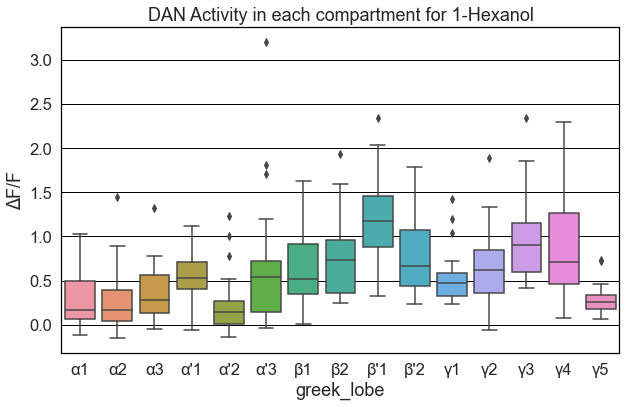

In [154]:
stimulus = '1-Hexanol'

plt.figure(figsize=(10, 6))
b = sns.boxplot(x="greek_lobe", y="ΔF/F", data=df_minimal[df_minimal['stimulus'] == stimulus])
plt.title(f'DAN Activity in each compartment for {stimulus}')

Text(0.5, 1.0, 'Mean DAN activity for 1-Hexanol')

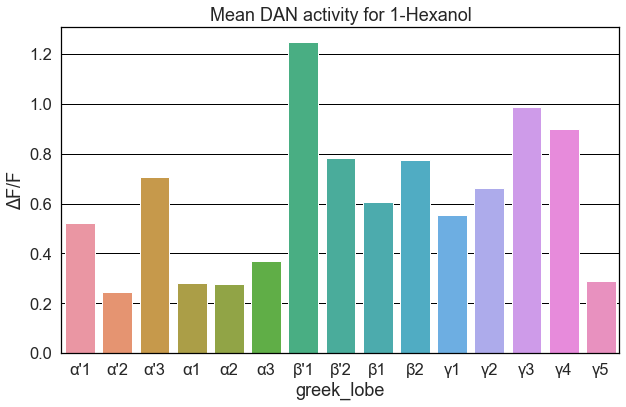

In [155]:
ex = df_minimal[df_minimal['stimulus'] == stimulus].groupby('greek_lobe').mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=ex.index, y='ΔF/F', data=ex);
plt.title(f'Mean DAN activity for {stimulus}')

In [156]:
ex = df_minimal.groupby(['stimulus', 'greek_lobe']).mean()
ex.reset_index(inplace=True)
ex.head()

,stimulus,greek_lobe,ΔF/F,pre_ΔF/F
0,1-Hexanol,α'1,0.522537,0.059294
1,1-Hexanol,α'2,0.245707,0.040273
2,1-Hexanol,α'3,0.706134,0.031759
3,1-Hexanol,α1,0.280743,0.042217
4,1-Hexanol,α2,0.275617,0.036379


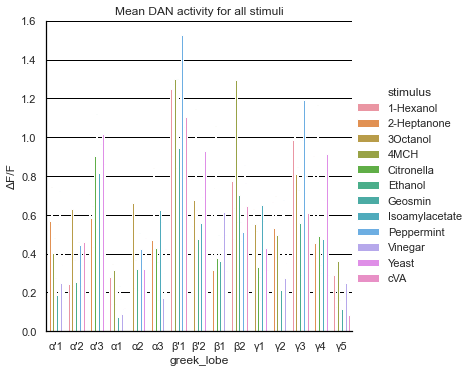

In [184]:
sns.set_context("notebook",font_scale=1)

# plt.figure(figsize=(16, 6))
b = sns.catplot(x="greek_lobe", y="ΔF/F", hue="stimulus", kind="bar", data=ex)
plt.title(f'Mean DAN activity for all stimuli')
plt.show()

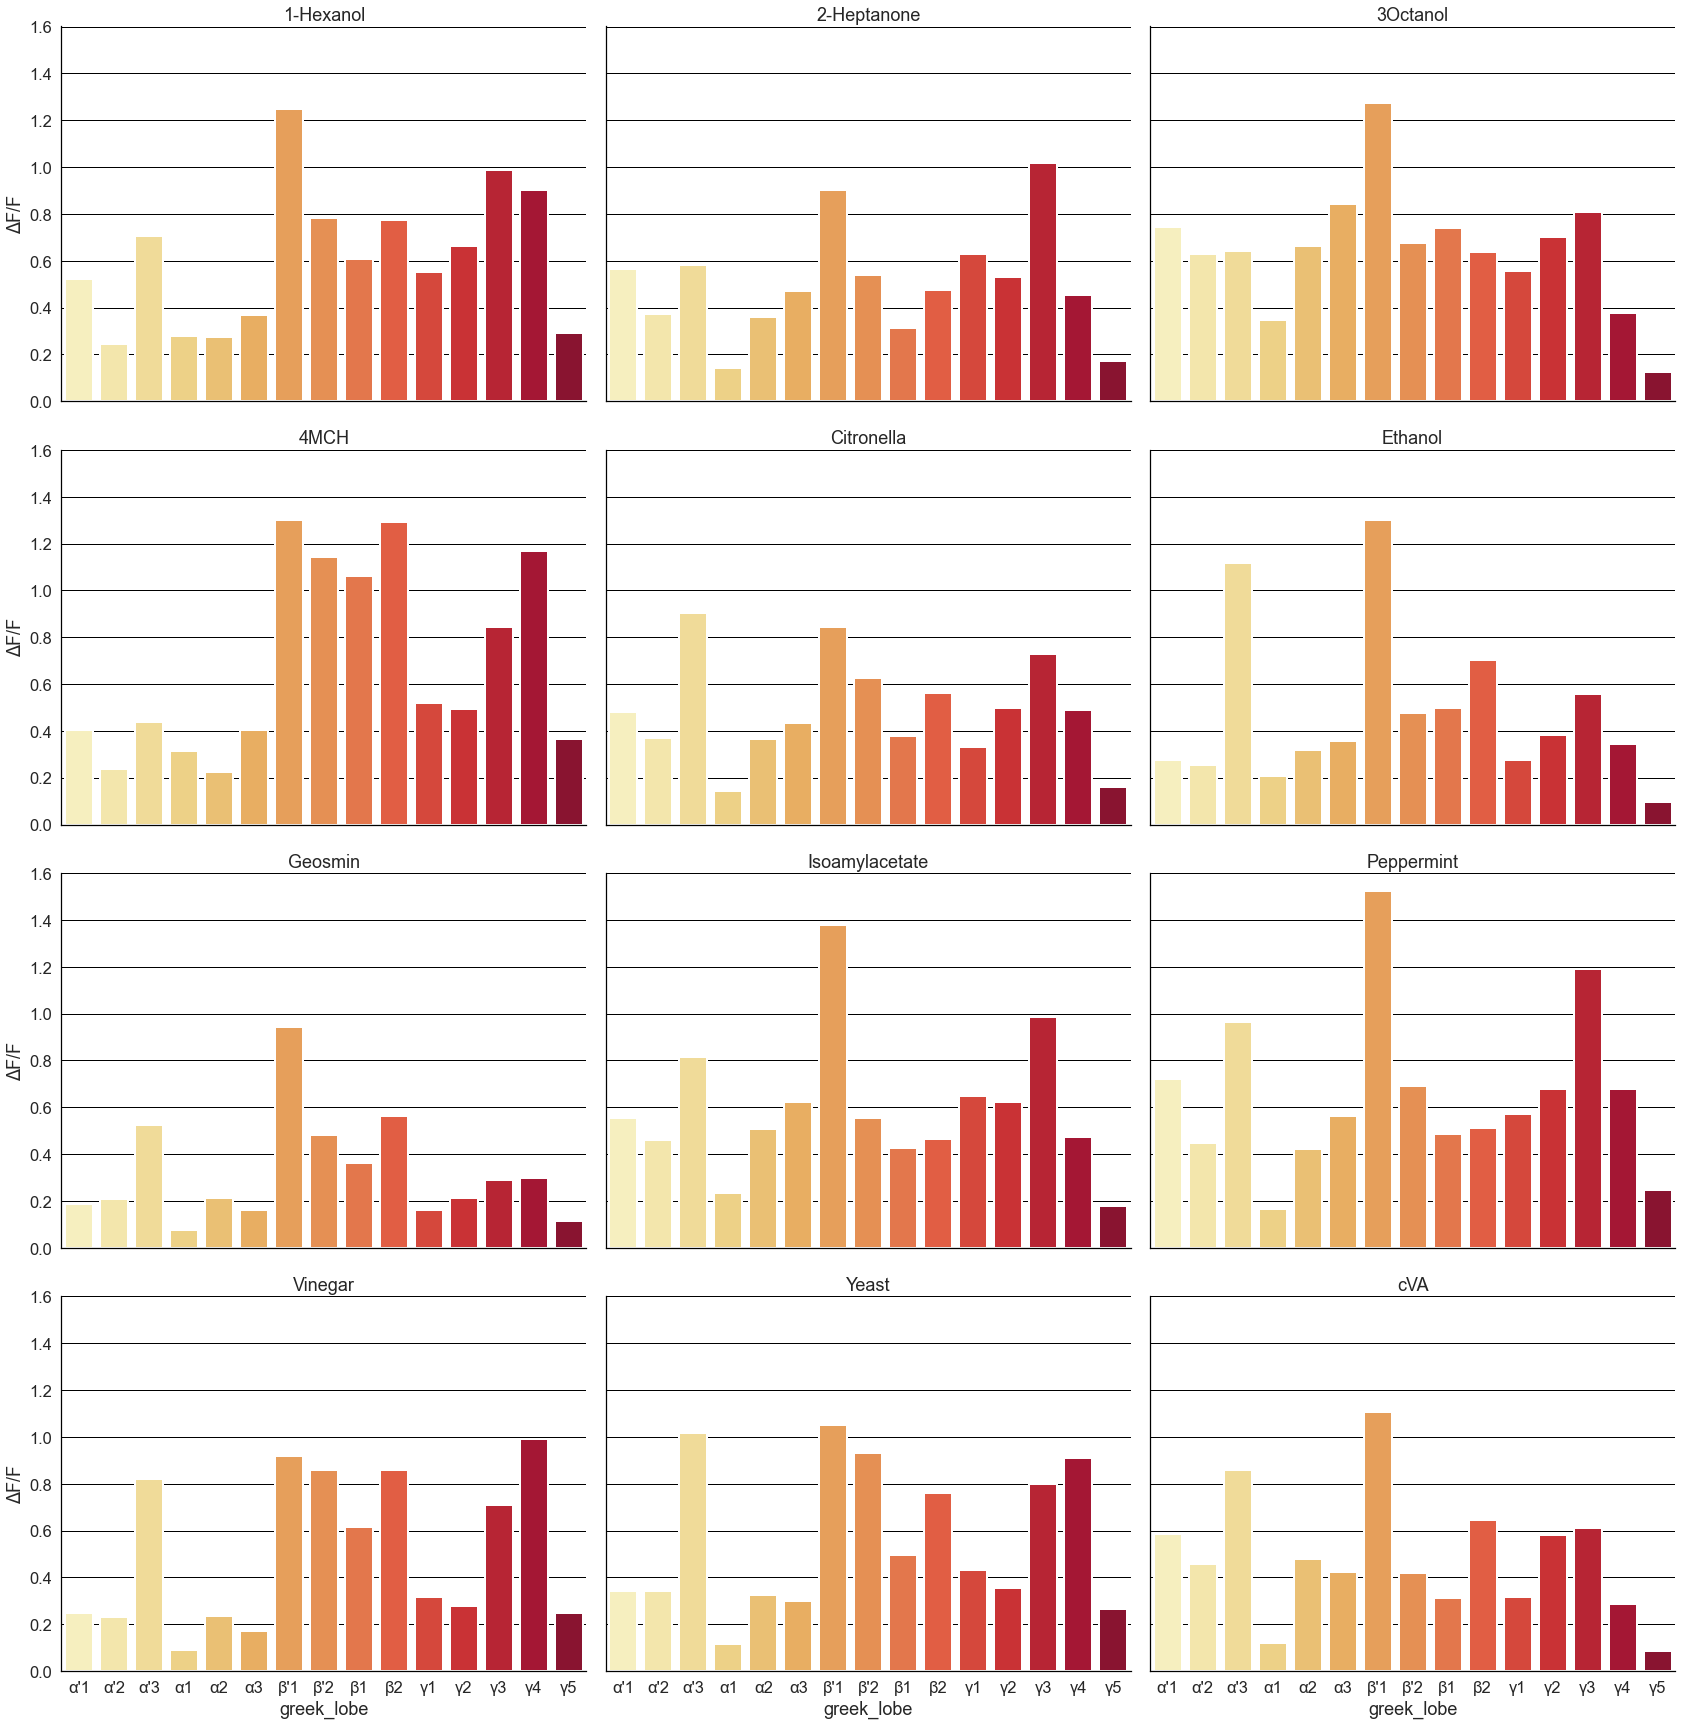

In [173]:
b = sns.catplot(
    x="greek_lobe", 
    y="ΔF/F", 
    col="stimulus", 
    col_wrap=3, 
    data=ex, 
    linewidth=2, 
    kind="bar",
    palette='YlOrRd',
    height=6, 
    aspect=1.3
)
b.set_titles("{col_name}") 

### Create Pivot Table

In [190]:
ex = df_minimal.groupby(['stimulus', 'greek_lobe']).mean()
ex.reset_index(inplace=True)
ex.head()

,stimulus,greek_lobe,ΔF/F,pre_ΔF/F
0,1-Hexanol,α'1,0.522537,0.059294
1,1-Hexanol,α'2,0.245707,0.040273
2,1-Hexanol,α'3,0.706134,0.031759
3,1-Hexanol,α1,0.280743,0.042217
4,1-Hexanol,α2,0.275617,0.036379


In [191]:
ex.pivot(index='greek_lobe', columns='stimulus', values='ΔF/F')

stimulus,1-Hexanol,2-Heptanone,3Octanol,4MCH,Citronella,Ethanol,Geosmin,Isoamylacetate,Peppermint,Vinegar,Yeast,cVA
greek_lobe,,,,,,,,,,,,
α'1,0.522537,0.566499,0.744930,0.404428,0.481624,0.276859,0.187068,0.554840,0.722583,0.246394,0.341463,0.586559
α'2,0.245707,0.374212,0.627846,0.235425,0.367692,0.255270,0.209110,0.458982,0.447005,0.230822,0.342419,0.458172
α'3,0.706134,0.581740,0.643226,0.436457,0.904901,1.117133,0.524501,0.814331,0.965673,0.818344,1.015078,0.860125
α1,0.280743,0.142432,0.346082,0.316079,0.141556,0.208673,0.074219,0.233291,0.165674,0.088059,0.116289,0.118710
α2,0.275617,0.360841,0.661575,0.225136,0.365226,0.319671,0.212317,0.508727,0.421672,0.235337,0.323195,0.478627
α3,0.368824,0.468953,0.842880,0.404874,0.431450,0.357895,0.162553,0.623453,0.561267,0.172045,0.301197,0.424641
β'1,1.246798,0.902461,1.272172,1.301942,0.841846,1.301551,0.943467,1.380607,1.524851,0.919013,1.051012,1.106423
β'2,0.783863,0.539906,0.675346,1.144612,0.624329,0.476513,0.479748,0.555562,0.692589,0.859492,0.930360,0.420489
β1,0.607848,0.313615,0.740489,1.059770,0.379645,0.498212,0.360497,0.427774,0.486610,0.616561,0.496783,0.311886
